<a href="https://colab.research.google.com/github/AabisZ/Deep-Learning/blob/main/Regression_problem_and_cost_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cost Function

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
#use this code to upload datasets to colab
import io 
from google.colab import files
uploaded =files.upload()

Saving weight-height.csv to weight-height.csv


In [6]:
df =pd.read_csv(io.BytesIO(uploaded['weight-height.csv']))

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
X =df[['Height']].values
y_true=df[['Weight']].values

In [8]:
def line(x,w=0,b=0):
  return w*x+b

def mean_squared_error(y_true,y_pred):
  s=(y_true-y_pred)**2
  return np.sqrt(s.mean())

Text(0.5, 0, 'b')

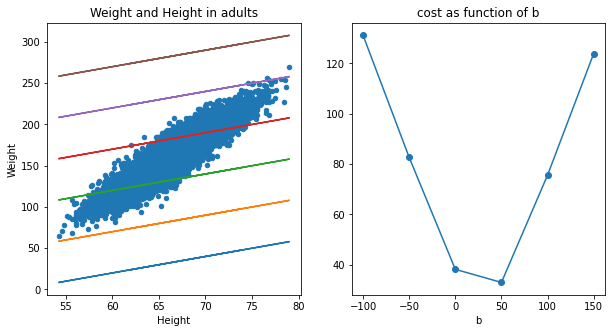

In [13]:
plt.figure(figsize=(10,5))
axl=plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults',ax=axl)
bs =np.array([-100,-50,0,50,100,150])
mses=[]
for b in bs:
  y_pred=line(X,w=2,b=b)
  mse=mean_squared_error(y_true,y_pred)
  mses.append(mse)
  plt.plot(X,y_pred)

ax2=plt.subplot(122)
plt.plot(bs,mses,'o-')
plt.title('cost as function of b')
plt.xlabel('b')

Linear regression with keras

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam ,SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [15]:
df =pd.read_csv(io.BytesIO(uploaded['weight-height.csv']))

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [16]:
X =df[['Height']].values
y_true=df[['Weight']].values

In [17]:
X.shape

(10000, 1)

In [18]:
model = Sequential()
model.add(Dense(1,input_shape=(1,)))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(Adam(lr=0.8),'mean_squared_error')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [22]:
model.fit(X,y_true,epochs=40)

Epoch 1/40
313/313 [==============================] - 1s 1ms/step - loss: 1381.8016
Epoch 2/40
313/313 [==============================] - 0s 1ms/step - loss: 578.1657
Epoch 3/40
313/313 [==============================] - 0s 1ms/step - loss: 538.7370
Epoch 4/40
313/313 [==============================] - 0s 1ms/step - loss: 487.9430
Epoch 5/40
313/313 [==============================] - 0s 1ms/step - loss: 472.0812
Epoch 6/40
313/313 [==============================] - 0s 1ms/step - loss: 454.1131
Epoch 7/40
313/313 [==============================] - 0s 1ms/step - loss: 380.5478
Epoch 8/40
313/313 [==============================] - 0s 1ms/step - loss: 356.1506
Epoch 9/40
313/313 [==============================] - 0s 1ms/step - loss: 331.4745
Epoch 10/40
313/313 [==============================] - 0s 1ms/step - loss: 293.6265
Epoch 11/40
313/313 [==============================] - 0s 1ms/step - loss: 268.3659
Epoch 12/40
313/313 [==============================] - 0s 1ms/step - loss: 251.6143


In [23]:
y_pred=model.predict(X)

In [24]:
y_pred

array([[214.4678 ],
       [175.88528],
       [216.4719 ],
       ...,
       [138.4545 ],
       [177.8074 ],
       [123.80072]], dtype=float32)

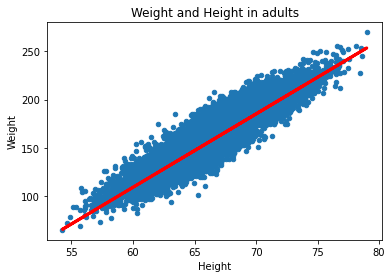

In [28]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X,y_pred,color='red',linewidth=3)

In [29]:
w,b=model.get_weights()

In [30]:
model.predict([[200]])

array([[1175.4142]], dtype=float32)